In [1]:
import numpy as np
import pandas as pd

# Simulate sensor data for soil moisture, temperature, humidity, and nutrient levels
data = {
    'soil_moisture': np.random.uniform(10, 80, 100),  # Percentage
    'temperature': np.random.uniform(15, 35, 100),    # Degrees Celsius
    'humidity': np.random.uniform(30, 90, 100),       # Percentage
    'nutrient_level': np.random.uniform(50, 150, 100) # Arbitrary units
}

df = pd.DataFrame(data)
print(df.head())


   soil_moisture  temperature   humidity  nutrient_level
0      47.079402    25.393922  71.543750       60.810692
1      20.552315    24.652517  79.341448      126.431542
2      23.315284    32.145495  65.821110       71.398226
3      51.338060    26.547539  73.004695      132.408317
4      52.740192    28.125534  79.590420       80.780217


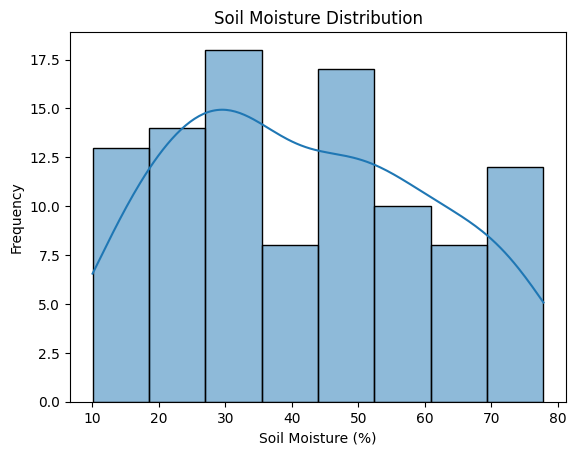

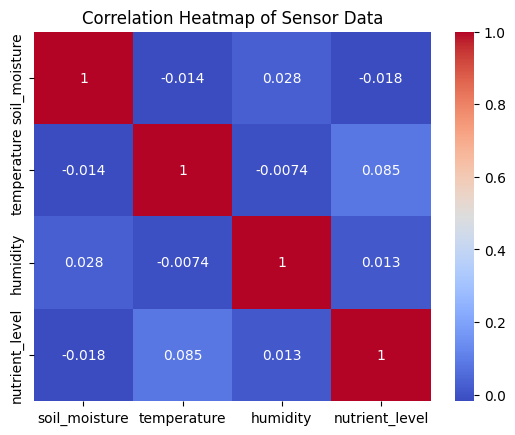

In [2]:
import matplotlib.pyplot as plt-
import seaborn as sns

# Plot the distribution of soil moisture
sns.histplot(df['soil_moisture'], kde=True)
plt.title("Soil Moisture Distribution")
plt.xlabel("Soil Moisture (%)")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Sensor Data")
plt.show()


Model Accuracy: 1.00


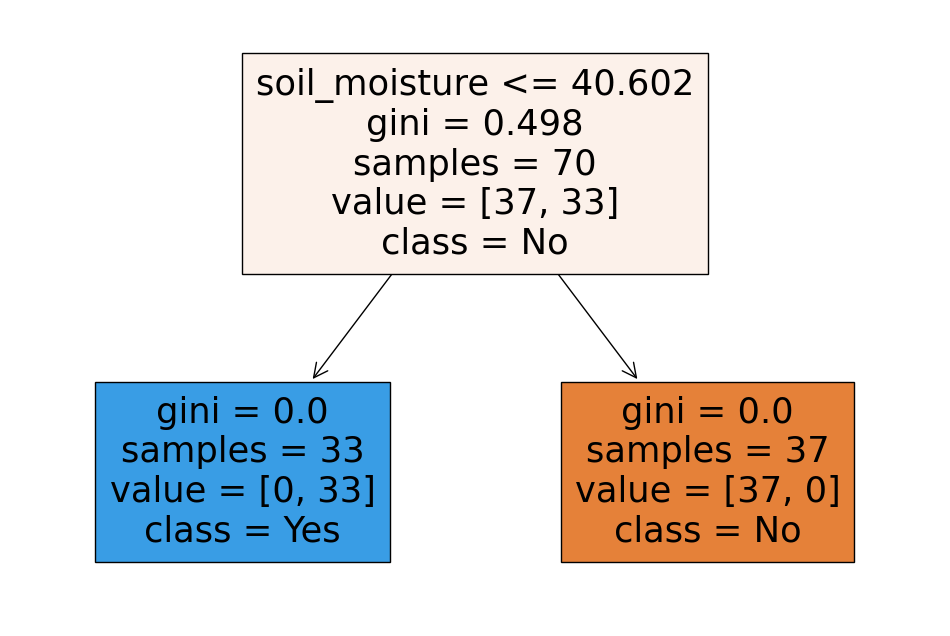

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a binary target variable: 1 if watering is needed, 0 otherwise
df['needs_watering'] = np.where(df['soil_moisture'] < 40, 1, 0)

# Feature selection and train-test split
X = df[['soil_moisture', 'temperature', 'humidity', 'nutrient_level']]
y = df['needs_watering']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


In [4]:
def automate_irrigation(soil_moisture, temperature, humidity, nutrient_level):
    input_data = np.array([[soil_moisture, temperature, humidity, nutrient_level]])
    watering_decision = model.predict(input_data)
    if watering_decision == 1:
        print("Irrigation ON: Watering the crops.")
        # Logic to turn on the water supply
    else:
        print("Irrigation OFF: No watering needed.")
        # Logic to keep the water supply off

# Example of using the function with simulated data
automate_irrigation(35, 25, 60, 100)


Irrigation ON: Watering the crops.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [5]:
def automate_nutrient_supply(nutrient_level):
    # Basic rule-based logic for nutrient supply
    if nutrient_level < 70:
        print("Nutrient Supply ON: Delivering nutrients.")
        # Logic to release nutrients
    else:
        print("Nutrient Supply OFF: Nutrients not needed.")
        # Logic to keep the nutrient supply off

# Example of using the function with simulated data
automate_nutrient_supply(65)


Nutrient Supply ON: Delivering nutrients.
